# Project Report
This Data Engineering project analyzes the correlation between the frequency of checks conducted on air transport of dangerous goods and the number of accidents that occur. The insights gained from this project can inform policy decisions and resource allocation in the transportation industry.

## Agenda
1. [Dataset](#Dataset)
2. [Data Pipeline](#Data-Pipeline)
    * Preperation
    * Extract Data
    * Transform Data
    * Load Data into SQL
    * Testing
3. [Exploratory Analysis](#Exp) 
    * Load Data from SQL
    * Statistical Values
    * Visualization
4. [Conclusion from Data](#conc)


## 1.Dataset <a id='Dataset'></a>
Two data sets exist, both of which relate to dangerous goods in air traffic.
Dataset 1:
Refers to dangerous goods checks per year in Germany. A distinction is made between German air carriers/Foreign air carriers/Handling Agents/German airports and aerodromes/Express Courier with own aeroplanes.
Dataset 2:
Refers to incidents and acccidents with dangerous goods per year in Germany. A distinction is made between Incidents&Acccidents/Accidents with injuries to persons/Administrative offense proceedings/Applications for exemptions/Permissions for overflight/Approvals for the transport of Dangerous/Goods for German air carriers




## 2.Data Pipeline <a id='Data-Pipeline'></a>
## Code Description

This task was done in "/data/data_pipeline.py"
The given code represents a data pipeline that performs several tasks to process and store data. Here is a description of the code in words:

### Preperation
1. Import the necessary libraries:

The code begins by installing and importing the necessary libraries, sqlite3 for database operations and pandas for data manipulation.

In [2]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import openpyxl
import sqlite3
import matplotlib.pyplot as plt

### Extract Data
2. Load Excel files:

Two Excel files are loaded using the pd.read_excel() function. These files contain data related to 'Gefahrgutkontrollen' (hazard controls) and 'Gefahrgutzwischenfaelle' (hazard incidents) respectively, and they are fetched from online sources.

In [4]:
df1 = pd.read_excel('https://www.lba.de/SharedDocs/Downloads/DE/SBl/SBl3/Statistiken/Betrieb/Gefahrgutkontrollen.xlsx?__blob=publicationFile&v=5', engine='openpyxl')
df2 = pd.read_excel('https://www.lba.de/SharedDocs/Downloads/DE/SBl/SBl3/Statistiken/Betrieb/Gefahrgutzwischenfaelle.xlsx?__blob=publicationFile&v=5', engine='openpyxl')

### Transform Data

3. Specify rows to delete for each DataFrame and drop them:

The code specifies the rows to be deleted for each DataFrame using the rows_to_delete1 and rows_to_delete2 lists.
Rows are deleted from both DataFrames using the drop() method with inplace=True.

In [5]:
rows_to_delete1 = [0, 1, 2, 3, 4, 5, 6, 7]
rows_to_delete2 = [0, 1, 2, 3, 4, 5, 6, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]

df1.drop(rows_to_delete1, inplace=True)
df2.drop(rows_to_delete2, inplace=True)

4. Modify column names:

The column names of both DataFrames are modified by assigning new names using the columns attribute.

In [6]:
column_names1 = ['Year', 'German air carriers', 'Foreign air carriers','Handling Agents', 'German Airports and Aerodromes','Express Courier with own aeroplanes'] 
df1.columns = column_names1

column_names2 = ['Year','Incidents/Accidents','Accidents with injuries to persons','administrative offense proceedings','Applications for exemptions','Permissions for overflight','Approvals for the transport of Dangerous Goods for German air carriers']
df2.columns = column_names2

5. Set 'Year' as the index for both DataFrames:

The 'Year' column is set as the index for both DataFrames using the set_index() method. As an example the table df1 is printed to show the result of the data tranformation.

In [7]:
df1= df1.set_index('Year')
df2= df2.set_index('Year')

print(df1)
print(df2)

     German air carriers Foreign air carriers Handling Agents  \
Year                                                            
2000                   2                   16              42   
2001                  15                    8              28   
2002                  22                   16              39   
2003                  46                   24              23   
2004                  56                   35              39   
2005                  54                   38              78   
2006                  44                   14              54   
2007                  36                   16              58   
2008                  40                   20              63   
2009                  19                   18              75   
2010                  29                   14              87   
2011                  19                    5             103   
2012                  30                   21             108   
2013                  31 

### Load Data into SQL

6. Write DataFrames to SQLite tables:

A connection to an SQLite database is established using sqlite3.connect() by providing the path to the database file.

The DataFrames are written to separate tables in the SQLite database using the to_sql() method. If the tables already exist, the if_exists="replace" parameter ensures they are replaced with the new data.

In [8]:
conn = sqlite3.connect('C:/Users/magis/OneDrive/Desktop/data engineering/2023-amse-template_magnus/data/database.db')

df1.to_sql('Gefahrenkontrollen', conn, if_exists="replace")
df2.to_sql('Gefahrgutzwischenfaelle', conn, if_exists="replace")

23

### Testing
7. Database Existence Test

The python file (test.py), defines a function to check if the database file exists: The code defines a function named check_db_file_exists that takes the database connection as an argument. This function checks if the specified database file exists using the os.path.isfile() function. If the file exists, it prints a message indicating that the file exists. If the file does not exist, it prints a message indicating that the file does not exist.
This python test is later run by test.sh, which also shows a answer, if the file exists.

## Exploratory Analysis <a id='Exp'></a>

1. Load Data from SQL

First the Data is extracted from the SQL

In [9]:
df1 = pd.read_sql_query("SELECT * FROM Gefahrenkontrollen", conn)
df2 = pd.read_sql_query("SELECT * FROM Gefahrgutzwischenfaelle", conn)

2. Data Check

The Values are checked again and first 10 rows of each table are printed.


In [10]:
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Year                                 23 non-null     int64
 1   German air carriers                  23 non-null     int64
 2   Foreign air carriers                 23 non-null     int64
 3   Handling Agents                      23 non-null     int64
 4   German Airports and Aerodromes       23 non-null     int64
 5   Express Courier with own aeroplanes  23 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB


,Year,German air carriers,Foreign air carriers,Handling Agents,German Airports and Aerodromes,Express Courier with own aeroplanes
0,2000,2,16,42,14,2
1,2001,15,8,28,10,1
2,2002,22,16,39,16,0
3,2003,46,24,23,13,1
4,2004,56,35,39,20,1
5,2005,54,38,78,22,1
6,2006,44,14,54,14,2
7,2007,36,16,58,11,2
8,2008,40,20,63,18,2
9,2009,19,18,75,23,1


In [11]:
df2.info()
df2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column                                                                  Non-Null Count  Dtype
---  ------                                                                  --------------  -----
 0   Year                                                                    23 non-null     int64
 1   Incidents/Accidents                                                     23 non-null     int64
 2   Accidents with injuries to persons                                      23 non-null     int64
 3   administrative offense proceedings                                      23 non-null     int64
 4   Applications for exemptions                                             23 non-null     int64
 5   Permissions for overflight                                              23 non-null     int64
 6   Approvals for the transport of Dangerous Goods for German air carriers  23 non-null     int64
dtypes:

,Year,Incidents/Accidents,Accidents with injuries to persons,administrative offense proceedings,Applications for exemptions,Permissions for overflight,Approvals for the transport of Dangerous Goods for German air carriers
0,2000,785,10,42,22,28,28
1,2001,719,7,36,12,23,59
2,2002,814,4,33,24,27,28
3,2003,1360,6,33,20,20,27
4,2004,1385,4,28,35,18,10
5,2005,1149,4,8,44,19,8
6,2006,5231,2,10,28,32,5
7,2007,11641,7,4,53,54,13
8,2008,20851,3,11,87,29,3
9,2009,37510,5,10,88,55,11


3. Statistical Values

The Key statistical values per column are printed 

In [12]:
print(df1.describe())


             Year  German air carriers  Foreign air carriers  Handling Agents  \
count    23.00000            23.000000             23.000000        23.000000   
mean   2011.00000            39.478261             21.130435        59.956522   
std       6.78233            23.348875             20.642640        31.868306   
min    2000.00000             2.000000              0.000000         1.000000   
25%    2005.50000            22.000000              8.500000        39.000000   
50%    2011.00000            36.000000             16.000000        63.000000   
75%    2016.50000            50.000000             22.500000        85.000000   
max    2022.00000           116.000000             77.000000       108.000000   

       German Airports and Aerodromes  Express Courier with own aeroplanes  
count                       23.000000                            23.000000  
mean                        15.260870                             1.304348  
std                          7.472479  

In [13]:
print(df2.describe())

             Year  Incidents/Accidents  Accidents with injuries to persons  \
count    23.00000            23.000000                           23.000000   
mean   2011.00000         62372.608696                            3.086957   
std       6.78233         55587.248444                            2.609651   
min    2000.00000           719.000000                            0.000000   
25%    2005.50000          3308.000000                            1.000000   
50%    2011.00000         73085.000000                            3.000000   
75%    2016.50000         99765.500000                            4.000000   
max    2022.00000        171091.000000                           10.000000   

       administrative offense proceedings  Applications for exemptions  \
count                           23.000000                    23.000000   
mean                            11.304348                   122.695652   
std                             13.421268                    85.527473   
m

4. Visual Presentation

In order to find correlations in the data, the two tables are presented graphically.
The following code executes a SQL query, retrieves the data into a DataFrame, and creates a bar plot showing the 'Sum Controls' by year. The plot provides a visual representation of the data, allowing you to observe trends or patterns in the 'Sum Controls' over time.

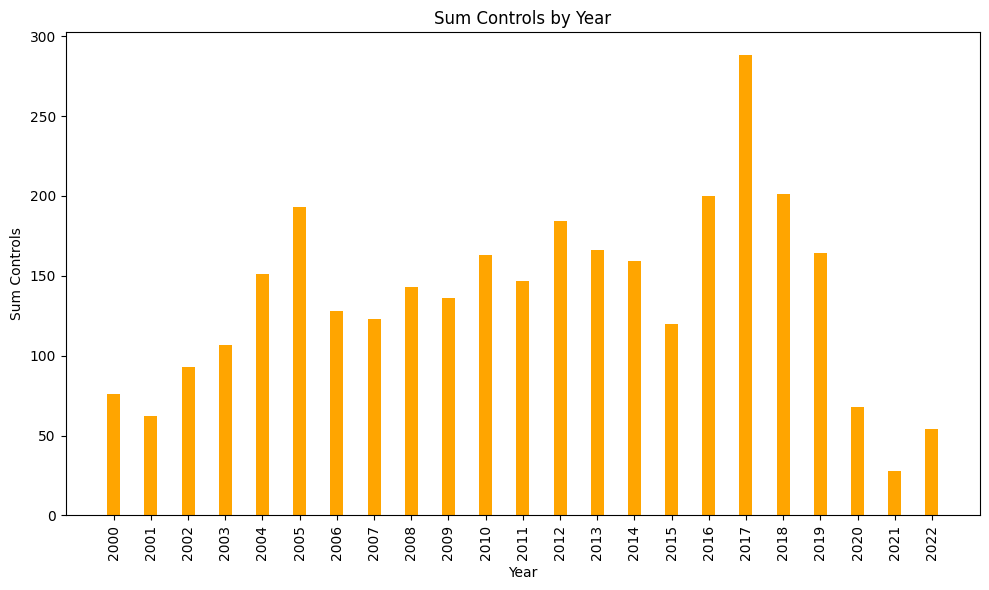

In [14]:
query = '''
SELECT Year, 
       `German air carriers`, 
       `Foreign air carriers`, 
       `Handling Agents`, 
       `German Airports and Aerodromes`, 
       `Express Courier with own aeroplanes`,
       (`German air carriers` + `Foreign air carriers` + `Handling Agents` +
        `German Airports and Aerodromes` + `Express Courier with own aeroplanes`) AS "sum controls"
FROM Gefahrenkontrollen
'''
df_sum_controls = pd.read_sql_query(query, conn)
fig, ax = plt.subplots(figsize=(10, 6))

x = df_sum_controls['Year']
y = df_sum_controls['sum controls']

bar_width = 0.35

bar_positions = [i for i in range(len(x))]

bars = ax.bar(bar_positions, y, bar_width, color='orange')

ax.set_xlabel('Year')
ax.set_ylabel('Sum Controls')
ax.set_title('Sum Controls by Year')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)

plt.tight_layout()
plt.show()

Overall, this code executes a SQL query, retrieves the data into a DataFrame, and creates a bar plot showing the 'Incidents/Accidents' by year. The plot provides a visual representation of the data, allowing you to observe trends or patterns in the incidents/accidents over time. The code follows a similar structure to the previous code, but with different query and column selections for the DataFrame and plot.

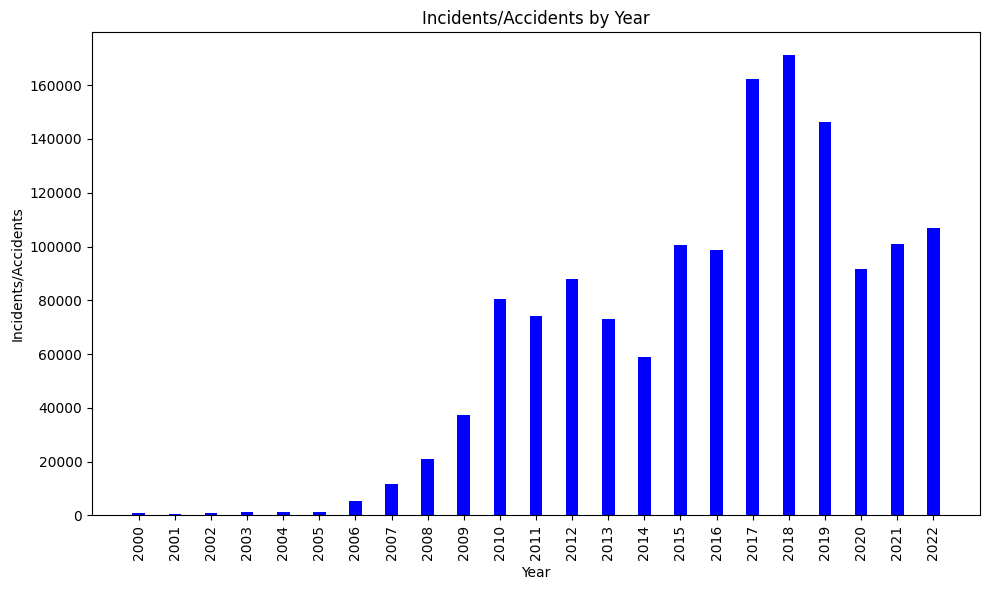

In [15]:
query1 = '''
SELECT Year, `Incidents/Accidents` AS Incidents
FROM Gefahrgutzwischenfaelle
'''
df_incidents = pd.read_sql_query(query1, conn)

fig, ax = plt.subplots(figsize=(10, 6))

x = df_incidents['Year']
y = df_incidents['Incidents']

bar_width = 0.35

bar_positions = [i for i in range(len(x))]

bars = ax.bar(bar_positions, y, bar_width, color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Incidents/Accidents')
ax.set_title('Incidents/Accidents by Year')
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)

plt.tight_layout()
plt.show()

The following code executes a SQL query, retrieves the data into a DataFrame, and creates a scatter plot comparing the relationship between 'Incidents' and 'Sum Controls' for each year. The scatter plot allows you to visually analyze how incidents and sum controls vary together across different years.

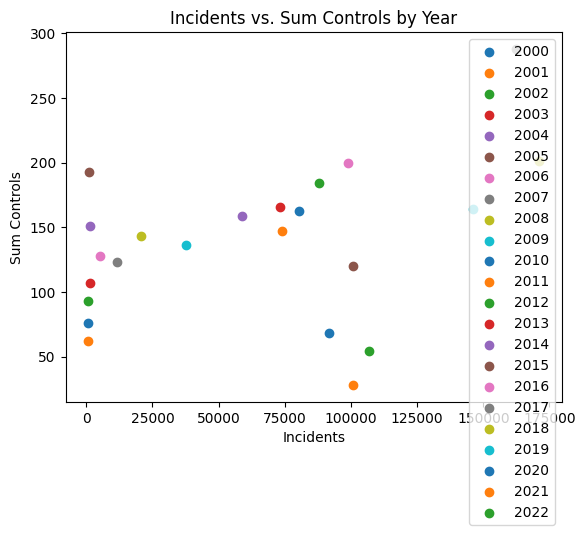

In [16]:
query = """
SELECT Gefahrenkontrollen.Year, `Incidents/Accidents` AS Incidents, `German air carriers`, 
       `Foreign air carriers`, 
       `Handling Agents`, 
       `German Airports and Aerodromes`, 
       `Express Courier with own aeroplanes`,
       (`German air carriers` + `Foreign air carriers` + `Handling Agents` +
        `German Airports and Aerodromes` + `Express Courier with own aeroplanes`) AS "sum controls"
FROM Gefahrenkontrollen
JOIN Gefahrgutzwischenfaelle ON Gefahrenkontrollen.Year = Gefahrgutzwischenfaelle.Year
GROUP BY Gefahrenkontrollen.Year;
"""

combined = pd.read_sql_query(query, conn)

# Plot scatter diagram
fig, ax = plt.subplots()
for year, data in combined.groupby('Year'):
    ax.scatter(data['Incidents'], data['sum controls'], label=year)

# Set labels and title
ax.set_xlabel('Incidents')
ax.set_ylabel('Sum Controls')
ax.set_title('Incidents vs. Sum Controls by Year')

# Add legend
ax.legend()

# Show the plot
plt.show()

To compare the change in % overtime the Growth Rate of Incidents and Controls is printed.

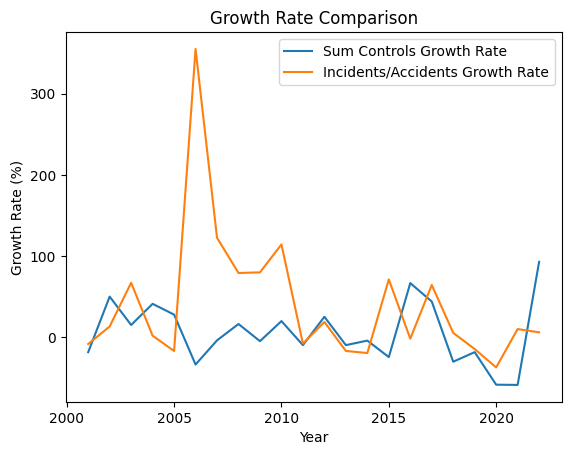

In [17]:
df = pd.read_sql_query(query, conn)

# Calculate the growth rate compared to the previous year
df['Sum controls_growth'] = df['sum controls'].pct_change() * 100
df['Incidents_growth'] = df['Incidents'].pct_change() * 100

# Create the line plot
plt.plot(df['Year'], df['Sum controls_growth'], label='Sum Controls Growth Rate')
plt.plot(df['Year'], df['Incidents_growth'], label='Incidents/Accidents Growth Rate')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rate Comparison')

# Add legend
plt.legend()

# Display the plot
plt.show()

Since 2006, airlines and airports have also reported to the LBA all incidents involving the removal of dangerous goods from passengers' baggage, which explains the big increase after 2005.


### Conclusions from Data <a id='conc'></a>
No direct correlations can be found in the data between more dangerous goods inspections and dangerous goods accidents. Nevertheless, it should be possible to prevent accidents that occur due to technical failure, which could be detected beforehand through inspections. Therefore, I would recommend focusing inspections on these areas in order to prevent possible accidents.
